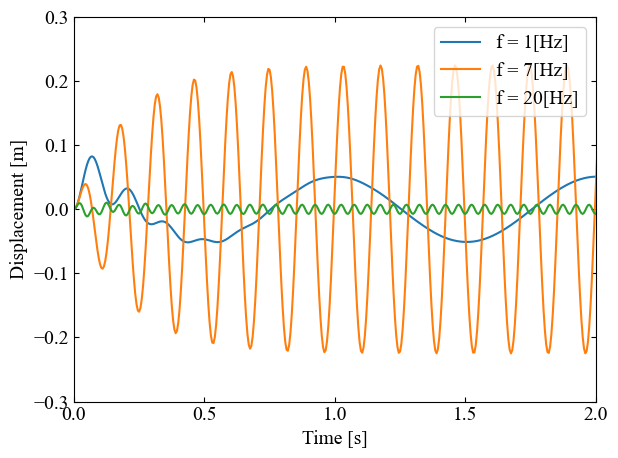

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# mkc force system
def func(state,t, m, k, c, A, f):
    x1, x2 = state
    dx2dt = - (c/m) * x2 - (k/m) * x1 + A * np.cos(2*np.pi*f*t)
    return [x2, dx2dt]

m = 0.5                         # 質量[kg]
k = 1000                        # 剛性[N/m]
c = 5                           # 減衰係数[N・s/m]
A = 100                         # 強制外力の振幅[N]
f = [1, 7, 20]                  # 強制外力の周波数[Hz]
state0 = [0.0, 0.0]             # 初期値[x0, v0]

t0 = 0                          # 初期時間[s]
tf = 10                         # 終了時間[s]
dt = 0.005                      # 時間刻み[s]
t = np.arange(t0, tf+dt, dt)    # 時間軸配列


# ここからグラフ描画
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Displacement [m]')

# データの範囲と刻み目盛を明示する。
ax1.set_xticks(np.arange(0, 10, 0.5))
ax1.set_yticks(np.arange(-1, 1, 0.1))
ax1.set_xlim(0, 2)
ax1.set_ylim(-0.3, 0.3)

# データプロット
labeling = ["f = 1[Hz]", "f = 7[Hz]", "f = 20[Hz]"]

for i in range(3):
    sol = odeint(func, state0, t, args=(m, k, c, A, f[i]))
    ax1.plot(t, sol[:, 0], label=labeling[i])

fig.tight_layout()
plt.legend(loc='upper right')

# グラフを表示する。
plt.show()
plt.close()